In [3]:
import random
import matplotlib.pyplot as plt
import pandas as pd

# The Monty Hall Problem

**Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?**



![](https://drive.google.com/uc?export=view&id=1PEfYQaQJgjdD_vWXnSaC6X9wgn-Bw8um)

## Simultion of the Game

Lets decide how many simulations we want to run. We can call this `n_simulations`.

In [4]:
n_simulations = 1000

This simple simulation conducts `n_simulations` runthroughs of the monte hall problem. The results are stored in `stay_wins` and `switch_wins`.

In [5]:
stay_wins = 0
switch_wins = 0
result_records = [] # This list keeps track of the results from the simulation
result_columns = ['Chosen Door', 'Open Door', 'Car Door', 'Winner']
for i in range(n_simulations):
    guess_door = random.randint(1, 3) # We can't do better than randomly guessing with our initial guess
    car_door = random.randint(1, 3) # The car can be behind door one, two, or three
    host_choices = list(set([1, 2, 3]) - set([guess_door, car_door])) # This is a list of the doors the host is allowed to open
    host_opens = random.choice(host_choices) # This is the door the host chose to open
    switch_door = list(set([1, 2, 3]) - set([guess_door, host_opens]))[0] # This would be your door if you switched

    if car_door == guess_door:
        stay_wins += 1
        winner = 'Stay'
    if car_door == switch_door:
        switch_wins += 1
        winner = 'Switch'
    
    result_records.append((guess_door, host_opens, car_door, winner))


## Results of the Simulation
- The results of the simulation are shows in the table below.
- We can help visualize the outcome with a bar plot


In [7]:
pd.DataFrame(result_records, columns=result_columns)

,Chosen Door,Open Door,Car Door,Winner
0,3,1,2,Switch
1,3,1,2,Switch
2,2,3,1,Switch
3,1,2,3,Switch
4,2,3,2,Stay
...,...,...,...,...
995,1,3,1,Stay
996,1,2,3,Switch
997,3,2,3,Stay
998,2,1,3,Switch


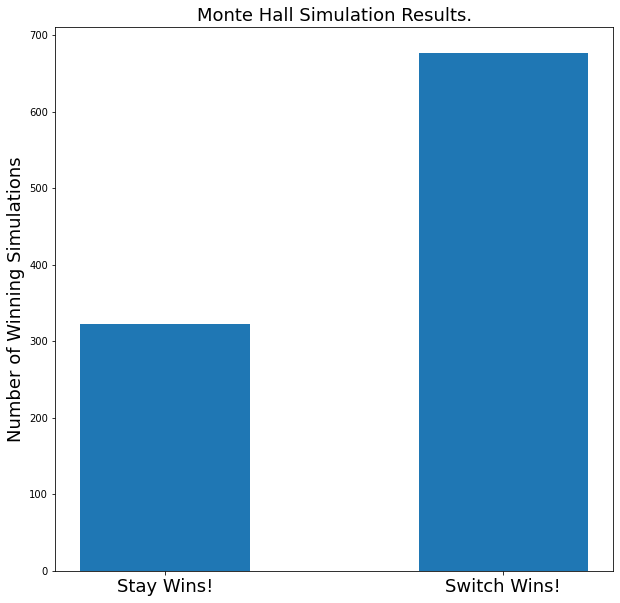

In [ ]:
fig, ax = plt.subplots()
ax.bar(['Stay Wins!', 'Switch Wins!'], [stay_wins, switch_wins], width=0.5)
ax.set_title('Monte Hall Simulation Results.', FontSize=18)
ax.set_ylabel('Number of Winning Simulations', FontSize=18)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Stay Wins!', 'Switch Wins!'], FontSize=18)
fig.set_size_inches(10, 10)